In [3]:
%cd Downloads

C:\Users\yashw\Downloads


In [56]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split 
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
data = pd.read_csv('EQ_2021_Data_Sample.csv')

C:\Users\yashw\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (31,32,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
data.head()

,countyFIPS,stateFIPS,date,confirmed_cases,deaths,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_parks,google_mobility_transit_stations,google_mobility_workplaces,...,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD
0,1001,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1003,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1005,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1007,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1009,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data.describe()

,countyFIPS,stateFIPS,confirmed_cases,deaths,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_parks,google_mobility_transit_stations,google_mobility_workplaces,google_mobility_residential,...,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD
count,1.179375e+06,1.179375e+06,1.179375e+06,1.179375e+06,566919.000000,512485.000000,196917.000000,318671.000000,836664.000000,456569.000000,...,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06
mean,3.035730e+04,3.026518e+01,2.016216e+03,4.852388e+01,-10.303391,0.584640,22.697456,-12.458790,-23.158080,7.895589,...,1.098786e+03,2.333414e+01,1.201366e+01,6.249557e-01,1.125452e+04,1.661977e+04,1.197940e-01,7.872846e-02,1.291507e-01,4.242515e-01
std,1.517704e+04,1.514963e+01,1.119552e+04,2.867077e+02,19.828237,15.212703,59.530412,26.229057,15.199087,6.011012,...,2.231530e+03,5.527166e+01,2.594898e+01,1.437939e-01,1.256925e+04,1.767744e+04,8.373358e-02,6.171769e-02,1.436028e-01,6.663241e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,-1.000000e+00,-100.000000,-96.000000,-95.000000,-93.000000,-92.000000,-46.000000,...,0.000000e+00,-1.200000e+01,-6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.817300e+04,1.800000e+01,4.000000e+00,0.000000e+00,-21.000000,-8.000000,-17.000000,-31.000000,-32.000000,4.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,5.746418e-01,2.879000e+03,4.948000e+03,6.339762e-02,3.786575e-02,0.000000e+00,0.000000e+00
50%,2.917300e+04,2.900000e+01,1.330000e+02,2.000000e+00,-9.000000,0.000000,9.000000,-10.000000,-23.000000,7.000000,...,2.610000e+02,4.000000e+00,1.000000e+00,6.517731e-01,7.432000e+03,1.136600e+04,9.945355e-02,6.154683e-02,9.843400e-02,6.058632e-01
75%,4.507900e+04,4.500000e+01,9.100000e+02,1.800000e+01,2.000000,8.000000,48.000000,5.000000,-14.000000,11.000000,...,1.098000e+03,2.400000e+01,1.200000e+01,7.126916e-01,1.377300e+04,2.045100e+04,1.699732e-01,1.116009e-01,2.268285e-01,7.427066e-01
max,5.604500e+04,5.600000e+01,1.078329e+06,1.633200e+04,261.000000,225.000000,709.000000,252.000000,66.000000,42.000000,...,2.191000e+04,1.318000e+03,4.470000e+02,1.228947e+00,5.747100e+04,1.046650e+05,1.220200e+00,1.000000e+00,1.073519e+00,5.849506e+01


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
# Plotting histogram of numerical variable and checking if there is any correlation with the categorical features.
def print_plot_and_display_means(numerical_variable, data, categorical_variable):
    """to plot histogram of various subject test score and seeing it's distribution with various categorical features"""
    sns.histplot(data=data, x=numerical_variable, hue=categorical_variable, multiple="dodge")
    print(data.groupby(categorical_variable)[numerical_variable].mean())

In [10]:
df = data.sample(n=10000)

In [11]:
df

,countyFIPS,stateFIPS,date,confirmed_cases,deaths,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_parks,google_mobility_transit_stations,google_mobility_workplaces,...,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD
719196,40005,40,2020-09-06,164,1,NaN,NaN,NaN,NaN,NaN,...,446.0,18.0,14.0,0.565028,5322.0,9419.0,0.086798,0.049164,0.168901,0.634715
696984,37093,37,2020-08-30,872,12,NaN,NaN,NaN,NaN,NaN,...,676.0,20.0,7.0,0.710424,15846.0,22305.0,0.060989,0.044065,0.128271,0.712134
23799,34017,34,2020-01-29,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246685,27119,27,2020-04-09,1,0,NaN,NaN,NaN,NaN,-39.0,...,0.0,0.0,0.0,0.380095,1753.0,4612.0,0.077816,0.029277,0.000000,0.000000
1056953,6091,6,2020-12-23,23,0,NaN,NaN,NaN,NaN,NaN,...,18952.0,177.0,138.0,0.790579,53655.0,67868.0,0.373406,0.295783,0.506270,0.857178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559072,46087,46,2020-07-17,21,1,NaN,NaN,NaN,NaN,-26.0,...,28.0,0.0,0.0,0.615782,1311.0,2129.0,0.062407,0.038070,0.070423,0.734940
70398,24029,24,2020-02-13,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
512469,53047,53,2020-07-02,87,2,49.0,NaN,NaN,NaN,-28.0,...,0.0,0.0,0.0,0.640923,7809.0,12184.0,0.060010,0.038187,0.000000,0.000000
176761,17089,17,2020-03-18,4,0,-34.0,12.0,-22.0,-38.0,-33.0,...,0.0,0.0,0.0,0.514286,36.0,70.0,0.083333,0.031579,0.000000,0.000000


In [ ]:
# Plotting histogram of 'math score' and checking if there is any correlation with 'gender'
print_plot_and_display_means('confirmed_cases', data, 'deaths')

In [12]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,countyFIPS,stateFIPS,confirmed_cases,deaths,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_parks,google_mobility_transit_stations,google_mobility_workplaces,google_mobility_residential,...,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD
719196,40005,40,164,1,NaN,NaN,NaN,NaN,NaN,NaN,...,446.0,18.0,14.0,0.565028,5322.0,9419.0,0.086798,0.049164,0.168901,0.634715
696984,37093,37,872,12,NaN,NaN,NaN,NaN,NaN,NaN,...,676.0,20.0,7.0,0.710424,15846.0,22305.0,0.060989,0.044065,0.128271,0.712134
23799,34017,34,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246685,27119,27,1,0,NaN,NaN,NaN,NaN,-39.0,NaN,...,0.0,0.0,0.0,0.380095,1753.0,4612.0,0.077816,0.029277,0.000000,0.000000
1056953,6091,6,23,0,NaN,NaN,NaN,NaN,NaN,NaN,...,18952.0,177.0,138.0,0.790579,53655.0,67868.0,0.373406,0.295783,0.506270,0.857178


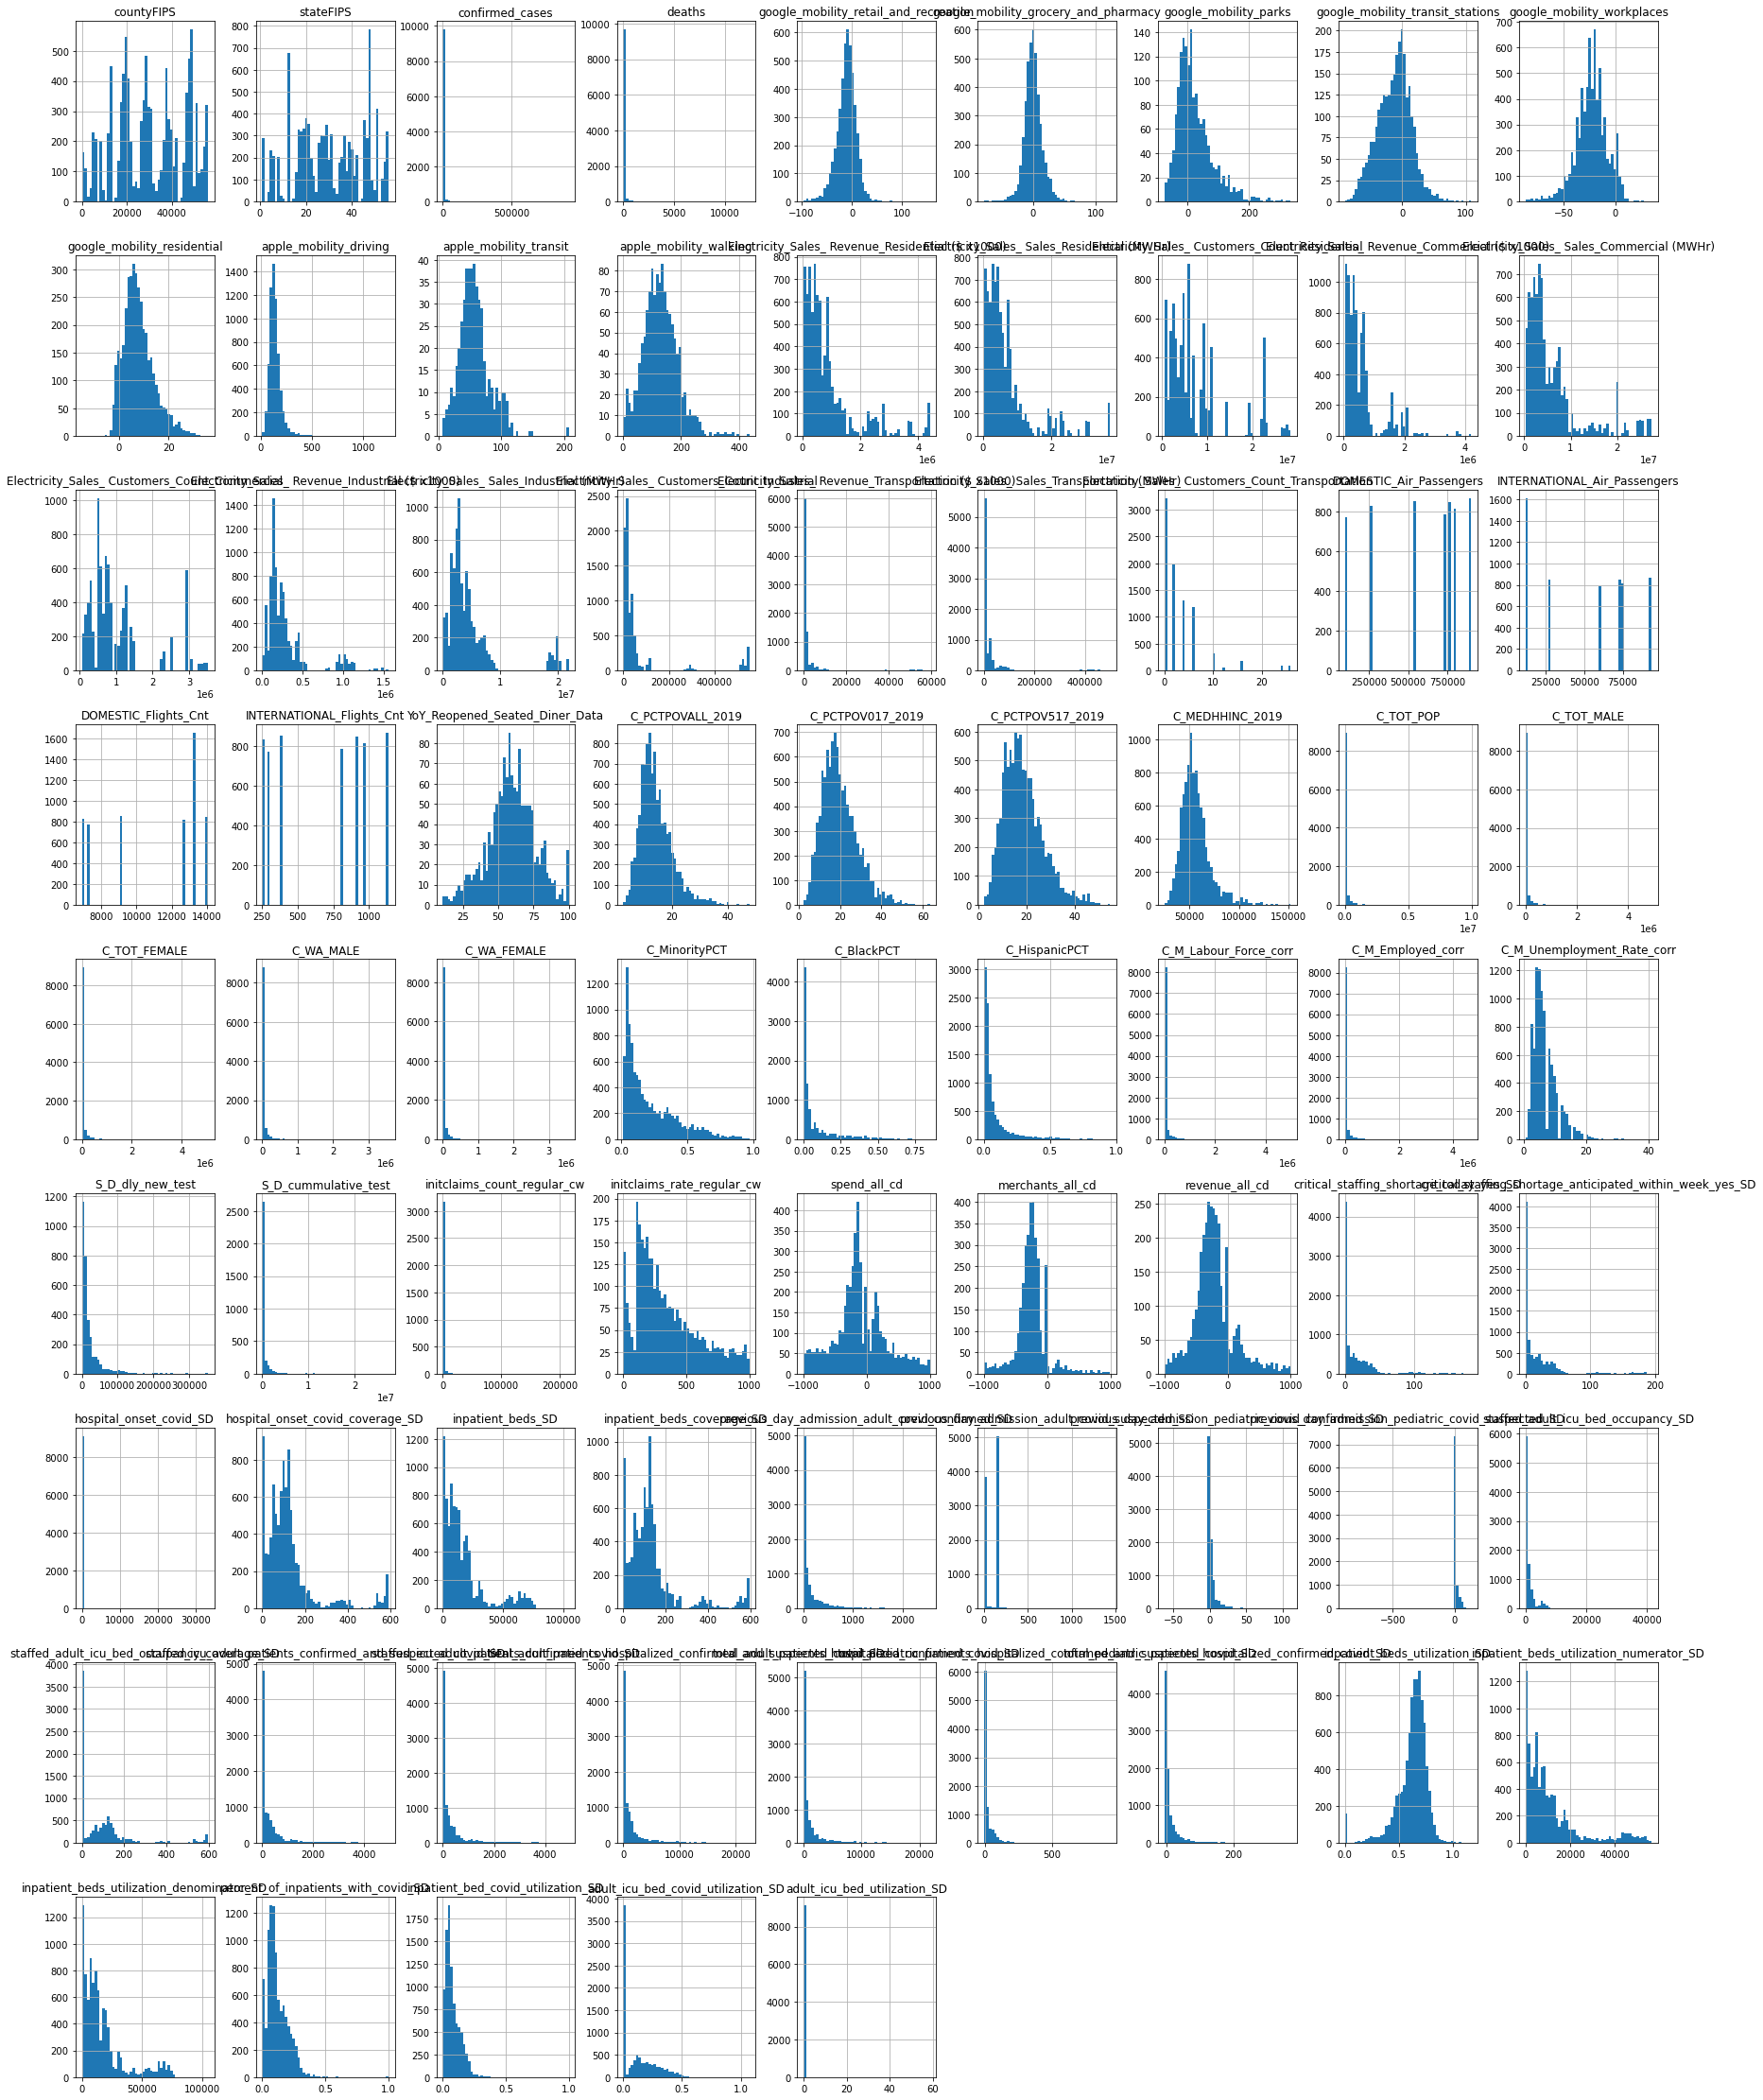

In [18]:
df_num.hist(figsize=(30, 40),bins=50); # ; avoid having the matplotlib verbose informations

In [15]:
df_num_corr = df_num.corr()['confirmed_cases'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with confirmed cases:\n{}".format(len(golden_features_list), golden_features_list))

There is 9 strongly correlated values with confirmed cases:
confirmed_cases          1.000000
deaths                   0.769519
C_M_Labour_Force_corr    0.705497
C_M_Employed_corr        0.695515
C_TOT_MALE               0.663180
C_TOT_POP                0.662708
C_WA_MALE                0.662680
C_TOT_FEMALE             0.662118
C_WA_FEMALE              0.661978
Name: confirmed_cases, dtype: float64


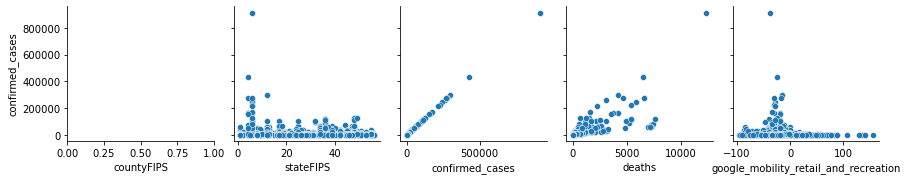

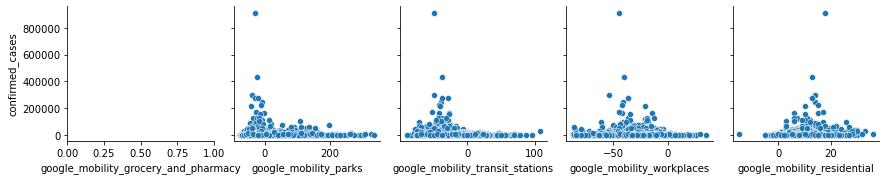

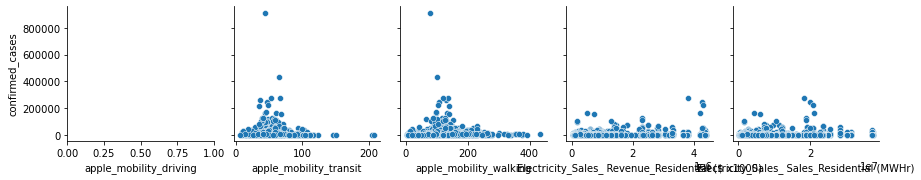

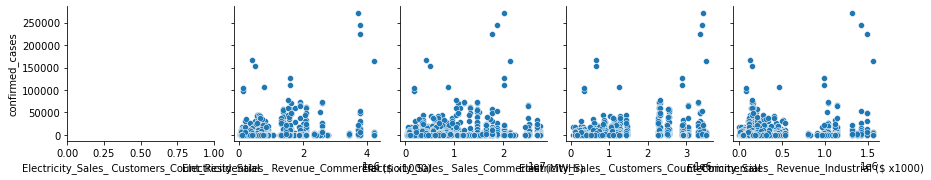

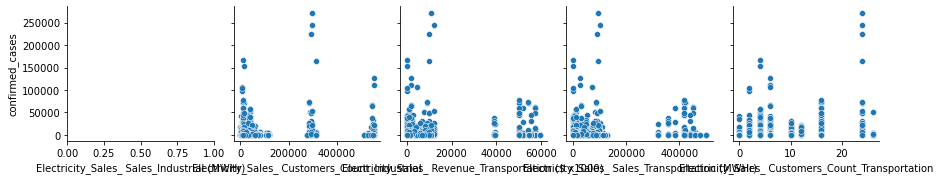

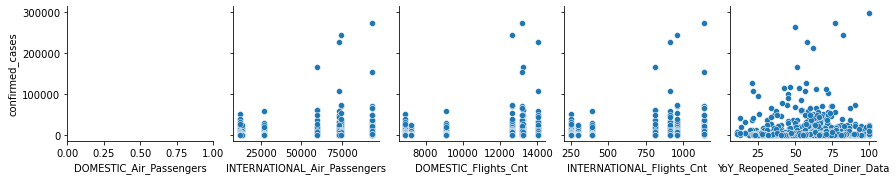

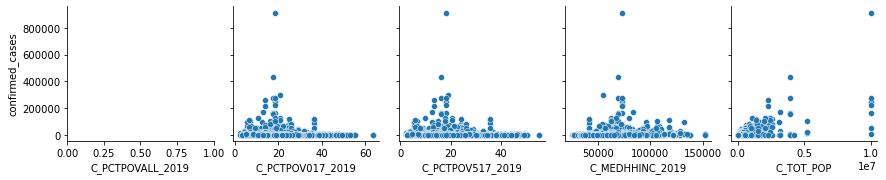

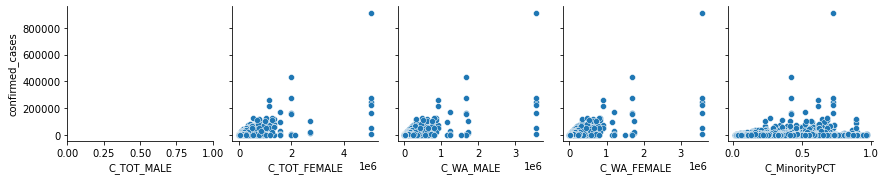

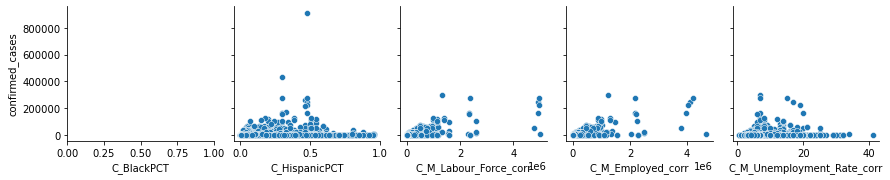

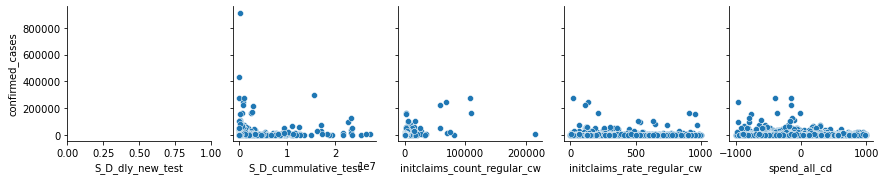

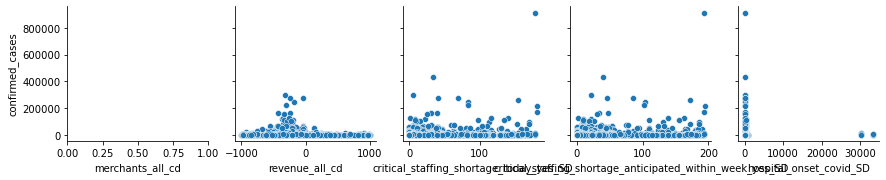

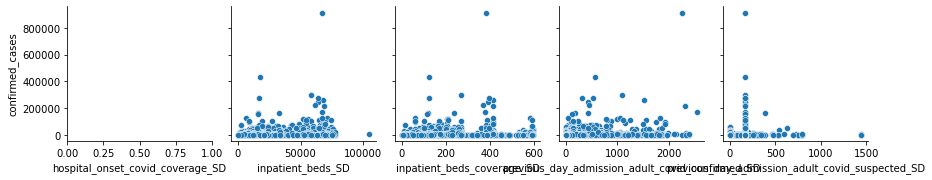

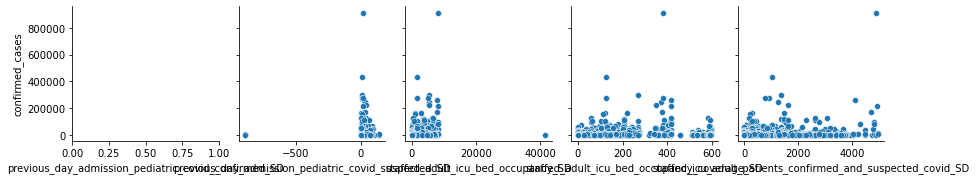

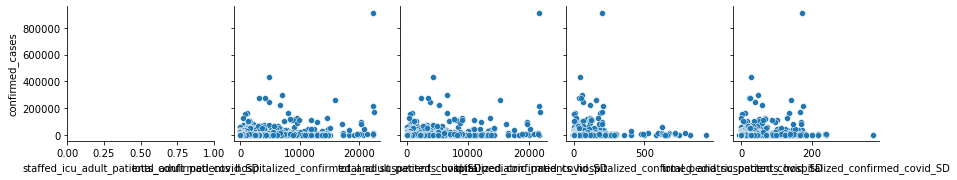

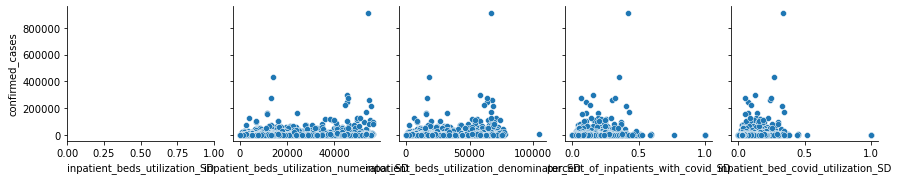

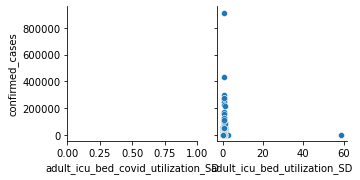

In [17]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['confirmed_cases'])

In [15]:
data['date'] = pd.to_datetime(data['date'])    
data['date_delta'] = (data['date'] - data['date'].min())
data["date_delta"] = data["date_delta"].astype('timedelta64[D]')

In [16]:
numeric_columns = data.select_dtypes(include=['float64','int64']).columns 
object_columns = data.select_dtypes(include=['object']).columns 
print('\nnumeric columns:\n', numeric_columns) 
print('\nobject columns:\n', object_columns)


numeric columns:
 Index(['countyFIPS', 'stateFIPS', 'confirmed_cases', 'deaths',
       'google_mobility_retail_and_recreation',
       'google_mobility_grocery_and_pharmacy', 'google_mobility_parks',
       'google_mobility_transit_stations', 'google_mobility_workplaces',
       'google_mobility_residential', 'apple_mobility_driving',
       'apple_mobility_transit', 'apple_mobility_walking',
       'Electricity_Sales_ Revenue_Residential ($ x1000)',
       'Electricity_Sales_ Sales_Residential (MWHr)',
       'Electricity_Sales_ Customers_Count_Residential',
       'Electricity_Sales_ Revenue_Commercial ($ x1000)',
       'Electricity_Sales_ Sales_Commercial (MWHr)',
       'Electricity_Sales_ Customers_Count_Commercial',
       'Electricity_Sales_ Revenue_Industrial ($ x1000)',
       'Electricity_Sales_ Sales_Industrial (MWHr)',
       'Electricity_Sales_ Customers_Count_Industrial',
       'Electricity_Sales_ Revenue_Transportation ($ x1000)',
       'Electricity_Sales_ Sales_Tra

In [17]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_data = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
missing_value_data.sort_values('percent_missing', inplace=True)

In [18]:
missing_value_data

,column_name,percent_missing
countyFIPS,countyFIPS,0.000000
new_test_count,new_test_count,0.000000
new_test_rate,new_test_rate,0.000000
test_rate,test_rate,0.000000
test_count,test_count,0.000000
...,...,...
google_mobility_transit_stations,google_mobility_transit_stations,72.979671
google_mobility_parks,google_mobility_parks,83.303275
YoY_Reopened_Seated_Diner_Data,YoY_Reopened_Seated_Diner_Data,85.917626
apple_mobility_walking,apple_mobility_walking,87.885533


In [19]:
data.drop("apple_mobility_transit", axis=1, inplace = True)
print(data.isnull().sum().sum())
data.fillna(data.median(),inplace=True)
print(data.isnull().sum().sum())

19104682


<ipython-input-19-3914571bebd7>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.fillna(data.median(),inplace=True)


0


In [20]:
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out
beta = data.drop(["countyFIPS","stateFIPS","date","confirmed_cases","deaths",'date_delta'], axis=1)
beta = trimm_correlated(beta, .9)
beta.shape

(1179375, 43)

In [21]:
temp = data[['google_mobility_retail_and_recreation',
       'google_mobility_grocery_and_pharmacy', 'google_mobility_parks',
       'google_mobility_transit_stations', 'google_mobility_workplaces',
       'google_mobility_residential', 'apple_mobility_driving',
       'apple_mobility_walking',
       'Electricity_Sales_ Revenue_Residential ($ x1000)',
       'Electricity_Sales_ Revenue_Industrial ($ x1000)',
       'Electricity_Sales_ Revenue_Transportation ($ x1000)',
       'Electricity_Sales_ Customers_Count_Transportation',
       'DOMESTIC_Air_Passengers', 'YoY_Reopened_Seated_Diner_Data',
       'C_PCTPOVALL_2019', 'C_MEDHHINC_2019', 'C_TOT_POP', 'C_MinorityPCT',
       'C_BlackPCT', 'C_HispanicPCT', 'C_M_Unemployment_Rate_corr',
       'S_D_dly_new_test', 'S_D_cummulative_test',
       'initclaims_count_regular_cw', 'initclaims_rate_regular_cw',
       'spend_all_cd', 'merchants_all_cd', 'revenue_all_cd',
       'critical_staffing_shortage_today_yes_SD', 'hospital_onset_covid_SD',
       'hospital_onset_covid_coverage_SD', 'inpatient_beds_SD',
       'previous_day_admission_adult_covid_confirmed_SD',
       'previous_day_admission_adult_covid_suspected_SD',
       'previous_day_admission_pediatric_covid_confirmed_SD',
       'previous_day_admission_pediatric_covid_suspected_SD',
       'staffed_adult_icu_bed_occupancy_SD',
       'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD',
       'total_pediatric_patients_hospitalized_confirmed_covid_SD',
       'inpatient_beds_utilization_SD', 'percent_of_inpatients_with_covid_SD',
       'adult_icu_bed_covid_utilization_SD', 'adult_icu_bed_utilization_SD',"countyFIPS","stateFIPS","date_delta","confirmed_cases","deaths"]]

In [23]:
gamma = temp.drop("deaths", axis=1)

In [24]:
y_res = gamma['confirmed_cases']
x_res = gamma.drop(['confirmed_cases'], axis=1, inplace=False)

In [25]:
x_res

,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_parks,google_mobility_transit_stations,google_mobility_workplaces,google_mobility_residential,apple_mobility_driving,apple_mobility_walking,Electricity_Sales_ Revenue_Residential ($ x1000),Electricity_Sales_ Revenue_Industrial ($ x1000),...,staffed_adult_icu_bed_occupancy_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,percent_of_inpatients_with_covid_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD,countyFIPS,stateFIPS,date_delta
0,-9.0,0.0,9.0,-10.0,-23.0,7.0,101.51,127.39,670692.302,309206.548,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1001,1,0.0
1,-9.0,0.0,9.0,-10.0,-23.0,7.0,103.12,94.32,670692.302,309206.548,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1003,1,0.0
2,-9.0,0.0,9.0,-10.0,-23.0,7.0,120.67,127.39,670692.302,309206.548,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1005,1,0.0
3,-9.0,0.0,9.0,-10.0,-23.0,7.0,111.18,127.39,670692.302,309206.548,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1007,1,0.0
4,-9.0,0.0,9.0,-10.0,-23.0,7.0,91.56,127.39,670692.302,309206.548,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1009,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179370,-9.0,0.0,9.0,-10.0,-23.0,7.0,161.13,127.39,591472.482,208233.414,...,51.0,3.0,3.0,0.417532,0.091549,0.119048,0.372263,56037,56,374.0
1179371,-9.0,0.0,9.0,-10.0,-23.0,7.0,171.60,127.39,591472.482,208233.414,...,51.0,3.0,3.0,0.417532,0.091549,0.119048,0.372263,56039,56,374.0
1179372,-9.0,0.0,9.0,-10.0,-23.0,7.0,148.02,127.39,591472.482,208233.414,...,51.0,3.0,3.0,0.417532,0.091549,0.119048,0.372263,56041,56,374.0
1179373,-9.0,0.0,9.0,-10.0,-23.0,7.0,131.14,127.39,591472.482,208233.414,...,51.0,3.0,3.0,0.417532,0.091549,0.119048,0.372263,56043,56,374.0


In [134]:
data=pd.read_csv('EQ_2021_Data_Sample.csv')
data.head()

C:\Users\karti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (31,32,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,countyFIPS,stateFIPS,date,confirmed_cases,deaths,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_parks,google_mobility_transit_stations,google_mobility_workplaces,...,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD
0,1001,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1003,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1005,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1007,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1009,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
data.describe()

,countyFIPS,stateFIPS,confirmed_cases,deaths,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_parks,google_mobility_transit_stations,google_mobility_workplaces,google_mobility_residential,...,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD
count,1.179375e+06,1.179375e+06,1.179375e+06,1.179375e+06,566919.000000,512485.000000,196917.000000,318671.000000,836664.000000,456569.000000,...,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06,1.080825e+06
mean,3.035730e+04,3.026518e+01,2.016216e+03,4.852388e+01,-10.303391,0.584640,22.697456,-12.458790,-23.158080,7.895589,...,1.098786e+03,2.333414e+01,1.201366e+01,6.249557e-01,1.125452e+04,1.661977e+04,1.197940e-01,7.872846e-02,1.291507e-01,4.242515e-01
std,1.517704e+04,1.514963e+01,1.119552e+04,2.867077e+02,19.828237,15.212703,59.530412,26.229057,15.199087,6.011012,...,2.231530e+03,5.527166e+01,2.594898e+01,1.437939e-01,1.256925e+04,1.767744e+04,8.373358e-02,6.171769e-02,1.436028e-01,6.663241e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,-1.000000e+00,-100.000000,-96.000000,-95.000000,-93.000000,-92.000000,-46.000000,...,0.000000e+00,-1.200000e+01,-6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.817300e+04,1.800000e+01,4.000000e+00,0.000000e+00,-21.000000,-8.000000,-17.000000,-31.000000,-32.000000,4.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,5.746418e-01,2.879000e+03,4.948000e+03,6.339762e-02,3.786575e-02,0.000000e+00,0.000000e+00
50%,2.917300e+04,2.900000e+01,1.330000e+02,2.000000e+00,-9.000000,0.000000,9.000000,-10.000000,-23.000000,7.000000,...,2.610000e+02,4.000000e+00,1.000000e+00,6.517731e-01,7.432000e+03,1.136600e+04,9.945355e-02,6.154683e-02,9.843400e-02,6.058632e-01
75%,4.507900e+04,4.500000e+01,9.100000e+02,1.800000e+01,2.000000,8.000000,48.000000,5.000000,-14.000000,11.000000,...,1.098000e+03,2.400000e+01,1.200000e+01,7.126916e-01,1.377300e+04,2.045100e+04,1.699732e-01,1.116009e-01,2.268285e-01,7.427066e-01
max,5.604500e+04,5.600000e+01,1.078329e+06,1.633200e+04,261.000000,225.000000,709.000000,252.000000,66.000000,42.000000,...,2.191000e+04,1.318000e+03,4.470000e+02,1.228947e+00,5.747100e+04,1.046650e+05,1.220200e+00,1.000000e+00,1.073519e+00,5.849506e+01


In [ ]:
data['date'] = data['date_time'].dt.date
data['year'] = data['date_time'].dt.year
data['month'] = data['date_time'].dt.month

In [ ]:
print('Date',len(data['date'].unique()))
print('Year',len(data['year'].unique()))
print('Month',len(data['month'].unique()))

In [136]:
data.nunique()

countyFIPS                                    3145
stateFIPS                                       51
date                                           375
confirmed_cases                              35580
deaths                                        4142
                                             ...  
inpatient_beds_utilization_denominator_SD    11109
percent_of_inpatients_with_covid_SD          15814
inpatient_bed_covid_utilization_SD           15801
adult_icu_bed_covid_utilization_SD            8694
adult_icu_bed_utilization_SD                  8931
Length: 82, dtype: int64

In [137]:
data.dtypes

countyFIPS                                     int64
stateFIPS                                      int64
date                                          object
confirmed_cases                                int64
deaths                                         int64
                                              ...   
inpatient_beds_utilization_denominator_SD    float64
percent_of_inpatients_with_covid_SD          float64
inpatient_bed_covid_utilization_SD           float64
adult_icu_bed_covid_utilization_SD           float64
adult_icu_bed_utilization_SD                 float64
Length: 82, dtype: object

In [138]:
data.drop(['date'], axis=1, inplace=True)

In [139]:
(data.isna().sum()/data.shape[0])*100

countyFIPS                                    0.000000
stateFIPS                                     0.000000
confirmed_cases                               0.000000
deaths                                        0.000000
google_mobility_retail_and_recreation        51.930556
                                               ...    
inpatient_beds_utilization_denominator_SD     8.356121
percent_of_inpatients_with_covid_SD           8.356121
inpatient_bed_covid_utilization_SD            8.356121
adult_icu_bed_covid_utilization_SD            8.356121
adult_icu_bed_utilization_SD                  8.356121
Length: 81, dtype: float64

In [140]:
data['test_count'] = data['test_count'].replace('.',np.nan)
data['test_rate'] = data['test_rate'].replace('.',np.nan)
data['new_test_rate'] = data['new_test_rate'].replace('.',np.nan)
data['new_test_count'] = data['new_test_count'].replace('.',np.nan)

In [141]:
nan_df = pd.DataFrame((data.isna().sum()/data.shape[0])*100, columns = ['perc_nan'])

In [142]:
to_drop = list(nan_df[nan_df['perc_nan'] > 70].index)
to_drop

['google_mobility_parks',
 'google_mobility_transit_stations',
 'apple_mobility_transit',
 'apple_mobility_walking',
 'YoY_Reopened_Seated_Diner_Data']

In [143]:
# Initial No. of Features
print(len(data.columns))

# Dropping Features with more than 40% NaN values
data.drop(to_drop, axis=1, inplace = True)

# Final No. of Features based on above operation
print(len(data.columns))

81
76


In [144]:
low = 0.01
high = 0.99
quant_df = data.quantile([low, high])
quant_df

,countyFIPS,stateFIPS,confirmed_cases,deaths,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_workplaces,google_mobility_residential,apple_mobility_driving,Electricity_Sales_ Revenue_Residential ($ x1000),...,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD
0.01,1061.0,1.0,0.00,0.0,-65.0,-38.0,-70.0,-2.0,47.5500,66831.766,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000
0.99,55125.0,55.0,33448.26,902.0,35.0,44.0,7.0,26.0,396.6014,4364859.640,...,11943.0,189.0,136.0,0.848404,52867.0,72541.0,0.349795,0.258313,0.490633,0.92377


In [145]:
data

,countyFIPS,stateFIPS,confirmed_cases,deaths,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_workplaces,google_mobility_residential,apple_mobility_driving,Electricity_Sales_ Revenue_Residential ($ x1000),...,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD
0,1001,1,0,0,NaN,NaN,NaN,NaN,101.51,670692.302,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,1003,1,0,0,NaN,NaN,NaN,NaN,103.12,670692.302,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,1005,1,0,0,NaN,NaN,NaN,NaN,120.67,670692.302,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,1007,1,0,0,NaN,NaN,NaN,NaN,111.18,670692.302,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,1009,1,0,0,NaN,NaN,NaN,NaN,91.56,670692.302,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179370,56037,56,3472,32,NaN,NaN,NaN,NaN,161.13,NaN,...,52.0,3.0,3.0,0.417532,724.0,1734.0,0.091549,0.038462,0.119048,0.372263
1179371,56039,56,3078,6,NaN,NaN,NaN,NaN,171.60,NaN,...,52.0,3.0,3.0,0.417532,724.0,1734.0,0.091549,0.038462,0.119048,0.372263
1179372,56041,56,1960,12,NaN,NaN,NaN,NaN,148.02,NaN,...,52.0,3.0,3.0,0.417532,724.0,1734.0,0.091549,0.038462,0.119048,0.372263
1179373,56043,56,864,25,NaN,NaN,NaN,NaN,NaN,NaN,...,52.0,3.0,3.0,0.417532,724.0,1734.0,0.091549,0.038462,0.119048,0.372263


In [146]:
(data.isna().sum()/data.shape[0])*100

countyFIPS                                    0.000000
stateFIPS                                     0.000000
confirmed_cases                               0.000000
deaths                                        0.000000
google_mobility_retail_and_recreation        51.930556
                                               ...    
inpatient_beds_utilization_denominator_SD     8.356121
percent_of_inpatients_with_covid_SD           8.356121
inpatient_bed_covid_utilization_SD            8.356121
adult_icu_bed_covid_utilization_SD            8.356121
adult_icu_bed_utilization_SD                  8.356121
Length: 76, dtype: float64

In [147]:
(data.isna().sum()/data.shape[0])*100

countyFIPS                                    0.000000
stateFIPS                                     0.000000
confirmed_cases                               0.000000
deaths                                        0.000000
google_mobility_retail_and_recreation        51.930556
                                               ...    
inpatient_beds_utilization_denominator_SD     8.356121
percent_of_inpatients_with_covid_SD           8.356121
inpatient_bed_covid_utilization_SD            8.356121
adult_icu_bed_covid_utilization_SD            8.356121
adult_icu_bed_utilization_SD                  8.356121
Length: 76, dtype: float64

In [148]:
data.fillna(data.mean(), inplace=True)

In [149]:
data.isna().sum()/data.shape[0]

countyFIPS                                   0.0
stateFIPS                                    0.0
confirmed_cases                              0.0
deaths                                       0.0
google_mobility_retail_and_recreation        0.0
                                            ... 
inpatient_beds_utilization_denominator_SD    0.0
percent_of_inpatients_with_covid_SD          0.0
inpatient_bed_covid_utilization_SD           0.0
adult_icu_bed_covid_utilization_SD           0.0
adult_icu_bed_utilization_SD                 0.0
Length: 76, dtype: float64

In [150]:
data.dropna(inplace=True)

In [151]:
data.shape

(1028670, 76)

In [152]:
data['county'] =  data['countyFIPS'] - data['stateFIPS']*1000
data=data[data['county']>0]

In [153]:
numeric_columns = data.select_dtypes(include=['float64','int64']).columns 
object_columns = data.select_dtypes(include=['object']).columns 

In [154]:
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out

In [155]:
data=data.drop(['test_count', 'test_rate', 'new_test_rate', 'new_test_count'],axis=1)

AttributeError: 'NoneType' object has no attribute 'shape'

In [156]:
Y = data['confirmed_cases']
X = data.drop('confirmed_cases',1)

In [157]:
data = data.drop(["countyFIPS","stateFIPS","confirmed_cases","deaths"], axis=1)
data = trimm_correlated(data, .9)
data.shape

(1028016, 40)

In [159]:
SEED= 27
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.1, random_state=SEED)

model = xgb.XGBRegressor(
 learning_rate =0.06,
 n_estimators=5000,
 max_depth=10,
 min_child_weight=6,
 gamma=3,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 scale_pos_weight=1,
 seed=27)

model.fit(X_train,y_train)
model.score(X_test,y_test)

ypred = model.predict(X_test)

In [160]:
ypred

In [161]:
model.score(X_test,y_test)

0.9952151300099364
